<a href="https://colab.research.google.com/github/Rajaonah01/TeamASH/blob/main/Partie_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Valeurs manquantes :
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


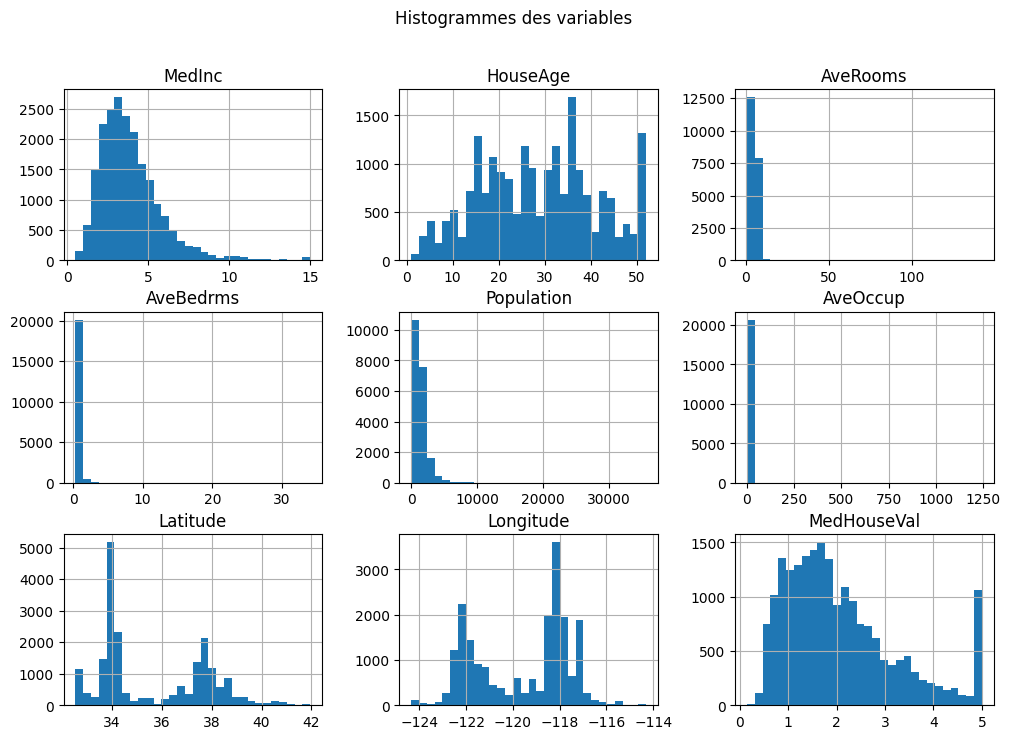

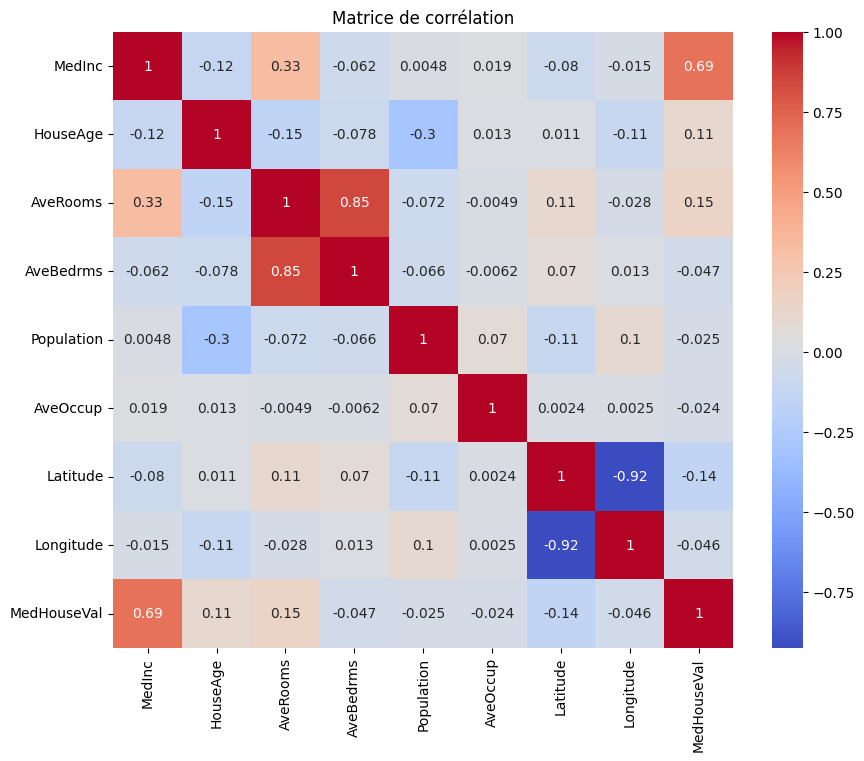

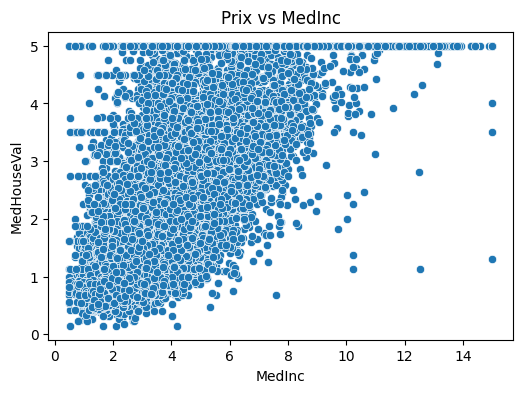

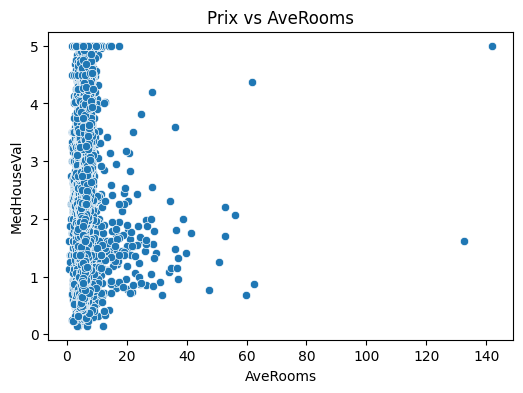

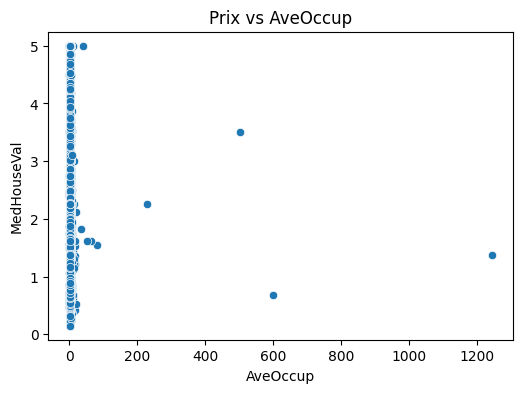

Régression linéaire (validation) :
MAE : 0.5333346447415042
MSE : 0.5297481095803488
R²  : 0.6142000785497264

Ridge (validation) :
MAE : 0.5333291962768497
MSE : 0.529736793597425
R²  : 0.6142083196462856

Lasso (validation) :
MAE : 0.6256907976095094
MSE : 0.6825254516439201
R²  : 0.5029368470222007

Évaluation finale (test set) avec Ridge :
MAE : 0.5332900148277523
MSE : 0.5617308843794812
R²  : 0.5713316272195021

Conclusion :
La régression Ridge offre de bonnes performances prédictives, en gérant bien la multicolinéarité. Les variables les plus influentes sur le prix sont le revenu médian, le nombre moyen de pièces et la densité d'occupation. Des pistes d'amélioration incluraient l'ajout de variables géographiques ou l'usage de modèles non linéaires comme les forêts aléatoires ou XGBoost.


In [1]:
# Partie B : Régression - California Housing

# 1. Chargement des bibliothèques et du dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Chargement
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

# 2. Nettoyage et vérifications
df.info()
df.describe()
print("Valeurs manquantes :")
print(df.isnull().sum())

# 3. EDA - Analyse exploratoire
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogrammes des variables")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Scatterplots prix vs quelques variables clés
features = ['MedInc', 'AveRooms', 'AveOccup']
for feat in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feat], y=df['MedHouseVal'])
    plt.title(f"Prix vs {feat}")
    plt.show()

# 4. Split Train / Validation / Test
train_val, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# 5. Feature engineering
X_train = train.drop("MedHouseVal", axis=1)
y_train = train["MedHouseVal"]
X_val = val.drop("MedHouseVal", axis=1)
y_val = val["MedHouseVal"]
X_test = test.drop("MedHouseVal", axis=1)
y_test = test["MedHouseVal"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Modèle de base : Régression linéaire
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_val = lr.predict(X_val_scaled)

print("Régression linéaire (validation) :")
print("MAE :", mean_absolute_error(y_val, y_pred_val))
print("MSE :", mean_squared_error(y_val, y_pred_val))
print("R²  :", r2_score(y_val, y_pred_val))

# 7. Modèles régularisés : Ridge et Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_val_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_val_scaled)

print("\nRidge (validation) :")
print("MAE :", mean_absolute_error(y_val, y_pred_ridge))
print("MSE :", mean_squared_error(y_val, y_pred_ridge))
print("R²  :", r2_score(y_val, y_pred_ridge))

print("\nLasso (validation) :")
print("MAE :", mean_absolute_error(y_val, y_pred_lasso))
print("MSE :", mean_squared_error(y_val, y_pred_lasso))
print("R²  :", r2_score(y_val, y_pred_lasso))

# 8. Évaluation finale sur le test set (meilleur modèle, ex: Ridge)
y_pred_test = ridge.predict(X_test_scaled)

print("\nÉvaluation finale (test set) avec Ridge :")
print("MAE :", mean_absolute_error(y_test, y_pred_test))
print("MSE :", mean_squared_error(y_test, y_pred_test))
print("R²  :", r2_score(y_test, y_pred_test))

# 9. Conclusion
print("\nConclusion :")
print("La régression Ridge offre de bonnes performances prédictives, en gérant bien la multicolinéarité. Les variables les plus influentes sur le prix sont le revenu médian, le nombre moyen de pièces et la densité d'occupation. Des pistes d'amélioration incluraient l'ajout de variables géographiques ou l'usage de modèles non linéaires comme les forêts aléatoires ou XGBoost.")
